In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')
# Set pretty printing format for floats
pd.set_option('float_format', '{:.2f}'.format)
# To view all columns
pd.set_option('display.max_columns', 999)

In [3]:
loan = pd.read_csv("loan.csv")

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [5]:
#loan.info(verbose=True,null_counts=True)
loan.shape

(39717, 111)

 ### Data Understanding: 

 If we glance through the meta data, we can see that there are three types of variables: 
 1. variables related to customer's demographics 
 2. variables related to the loan characteristics
 3. variables related to the customer's behavioural characteristic (after they were granted a loan).

 Customer's Demographic and application variables: 

 emp_title, emp_length, home_ownership, annual_inc, verification_status, addr_state, zip_code, title, purpose, desc, url 
 
 Loan related information & characteristics

 loan amount, funded amount, funded amount invested, interest rate, loan status, loan grade, loan sub-grade, dti, loan issue date, loan term, installment

 Credit information/ Customer Behaviour variables 

  delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv,   total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, application_type

### Data Clean-up

### Dropping columns which aren't useful for analysis

#### The objective of this analysis is to predict the risk at the application stage. There are some columns where values will not be available at the time of application, and hence cannot be used for analysis. These columns can be dropped.

In [6]:
cols_to_drop = ["collection_recovery_fee","delinq_2yrs","earliest_cr_line","inq_last_6mths","last_credit_pull_d",
                   "last_pymnt_amnt","last_pymnt_d","mths_since_last_delinq","next_pymnt_d","open_acc","out_prncp","out_prncp_inv","pub_rec",
                        "recoveries", "revol_bal", "revol_util", "total_acc", "total_pymnt", "total_pymnt_inv", "total_rec_int",
                           "total_rec_late_fee", "total_rec_prncp"]
                                        
loan = loan.drop(cols_to_drop,axis=1)
loan.shape

(39717, 89)

#### Also, nominal columns and columns which can't be used for analysis can be dropped.

In [7]:
cols_to_drop = ["id","member_id","emp_title","url","title","zip_code"]
loan = loan.drop(cols_to_drop,axis=1)
loan.shape

(39717, 83)

#### Columns which have a lot of zeroes as values

In [8]:
# Following columns are observed to have a lot of values as 0.
# %age of rows where acc_now_delinq = 0
print(round(len(loan[loan.acc_now_delinq == 0].index)*100/len(loan.index),2))
# %age of rows where chargeoff_within_12_mths = 0
print(round(len(loan[loan.chargeoff_within_12_mths == 0].index)*100/len(loan.index),2))
# %age of rows where delinq_amnt = 0
print(round(len(loan[loan.delinq_amnt == 0].index)*100/len(loan.index),2))
# %age of rows where pub_rec_bankruptcies = 0
print(round(len(loan[loan.pub_rec_bankruptcies == 0].index)*100/len(loan.index),2))
# %age of rows where collections_12_mths_ex_med = 0
print(round(len(loan[loan.collections_12_mths_ex_med == 0].index)*100/len(loan.index),2))
# %age of rows where tax_liens = 0
print(round(len(loan[loan.tax_liens == 0].index)*100/len(loan.index),2))

100.0
99.86
100.0
94.01
99.86
99.9


#### Columns with same value for all the rows

In [9]:
print(loan.policy_code.unique())
print(loan.initial_list_status.unique())
print(loan.pymnt_plan.unique())

[1]
['f']
['n']


#### Dropping the columns from above two analysis

In [10]:
cols_to_drop = ["acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies",
                "collections_12_mths_ex_med","tax_liens","policy_code","initial_list_status","pymnt_plan"]
loan = loan.drop(cols_to_drop,axis=1)
loan.shape

(39717, 74)

#### Column wise missing value analysis

In [11]:
# Percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_length                         3.00
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
desc                              33.00
purpose                            0.00
addr_state                         0.00
dti                                0.00
mths_since_last_record            93.00
mths_since_last_major_derog      100.00
application_type                   0.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00


#### There are a lot of columns where all the cells have missing values. Dropping columns where missing value %age is more than 90.

In [12]:
# Dropping the columns where 
loan = loan.drop(loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90], axis=1);
loan.shape

(39717, 19)

#### Row-wise missing value analysis

In [13]:
# Checking whether there are rows with more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

#### There are now rows where more than 5 cells have missing values.
#### The data can be considered clean for analysis now.

In [14]:
# beautifying the values in the column purpose
di = {'credit_card': 'Credit Card', 'car': 'Car', 'small_business': 'Small Business', 'other': 'Other', 'wedding': 'Wedding',
       'debt_consolidation': 'Debt Consolidation', 'home_improvement': 'Home Improv', 'major_purchase': 'Major Purchase',
       'medical': 'Medical', 'moving': 'Moving', 'vacation': 'Vacation', 'house': 'House', 'renewable_energy': 'Renewable Energy',
       'educational': 'Educational'}
loan.replace({"purpose": di}, inplace=True)

In [15]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,application_type
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,Credit Card,AZ,27.65,INDIVIDUAL
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,Car,GA,1.00,INDIVIDUAL
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,NaN,Small Business,IL,8.72,INDIVIDUAL
3,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,Other,CA,20.00,INDIVIDUAL
4,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,Other,OR,17.94,INDIVIDUAL


## Data Analysis

### Overall default rate

In [16]:
# There are three values for loan_status: 'Fully Paid', 'Charged Off', 'Current'
# Since rows with loan_status as 'Current' aren't useful for analysis, we can drop these rows.
loan = loan[loan.loan_status != 'Current']

In [17]:
# Creating a new colum status_flag which will have 0 for a paid off loan and 1 for a charged off loan
loan['status_flag'] = loan.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)

In [18]:
# We can find the overall default rate by using the status_flag column
round(np.mean(loan['status_flag'])*100, 2)

14.59

#### The overall default rate is about 14.59%

### Yearly and Monthly Application Distribution

In [19]:
# We first have to exract year and month information from column 'issue_d'
loan['issue_d'] = loan.issue_d.apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['issue_m'] = loan.issue_d.apply(lambda x: x.month)
loan['issue_y'] = loan.issue_d.apply(lambda x: x.year)

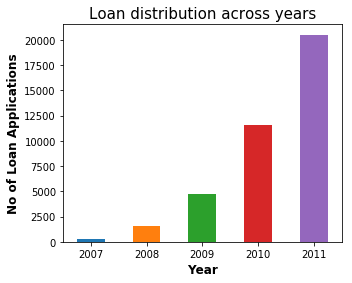

In [289]:
# The number of loans granted across years
loan_by_year = loan.groupby('issue_y').issue_y.count()
loan_by_year_plot = loan_by_year.plot(kind='bar', title="Loan distribution across years",figsize=(5,4), rot=0)
_ = loan_by_year_plot.title.set_size(15)
_ = loan_by_year_plot.set_xlabel("Year",fontsize=12,fontweight='bold')
_ = loan_by_year_plot.set_ylabel("No of Loan Applications",fontsize=12,fontweight='bold')

#### We see that the number of loans applied has increased gradually over the years

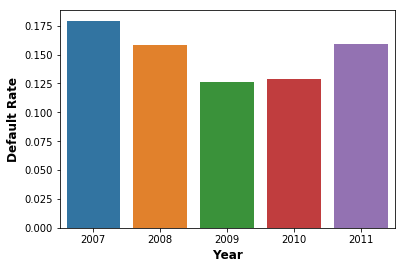

In [290]:
# Default rate across years
g = sns.barplot(x='issue_y', y='status_flag', data=loan, ci=None)
_ = g.set_xlabel("Year",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')
plt.show()

#### The default rate reduced from 2007 to 2010 but increased in 2011.

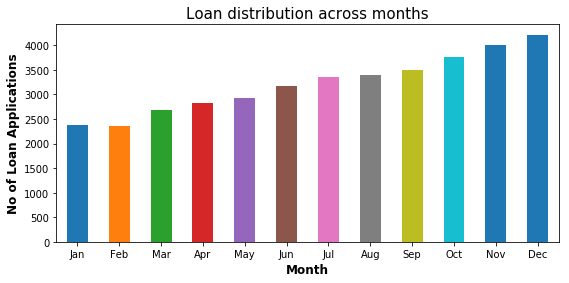

In [291]:
# Number of loans across months
loan_by_mon = loan.groupby('issue_m').issue_m.count()
loan_by_mon_plot = loan_by_mon.plot(kind='bar', title="Loan distribution across months",figsize=(9,4), rot=0)
_ = loan_by_mon_plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
_ = loan_by_mon_plot.title.set_size(15)
_ = loan_by_mon_plot.set_xlabel("Month",fontsize=12,fontweight='bold')
_ = loan_by_mon_plot.set_ylabel("No of Loan Applications",fontsize=12,fontweight='bold')

#### We see more loans are applied in second half of the year.

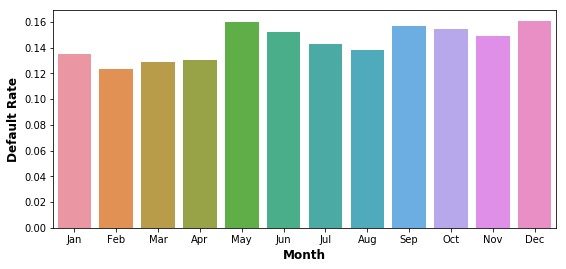

In [292]:
# Default rate across months
plt.figure(figsize=(9,4))
g = sns.barplot(x='issue_m', y='status_flag', data=loan, ci=None)
_ = g.set_xlabel("Month",fontsize=12,fontweight='bold')
_ = g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')
plt.show()

#### We can see that there is not much variation in default rate across months

### Loan Distribution by Purpose

In [293]:
loan_by_purpose_pct = pd.DataFrame(loan.groupby('purpose').funded_amnt.sum().sort_values(ascending=False))
loan_by_purpose_pct = pd.DataFrame(loan_by_purpose_pct.funded_amnt*100/loan_by_purpose_pct.funded_amnt.sum())
loan_by_purpose_pct

,funded_amnt
purpose,
Debt Consolidation,52.98
Credit Card,13.66
Home Improv,7.60
Other,7.21
Small Business,5.42
Major Purchase,4.08
Car,2.41
Wedding,2.14
Medical,1.31


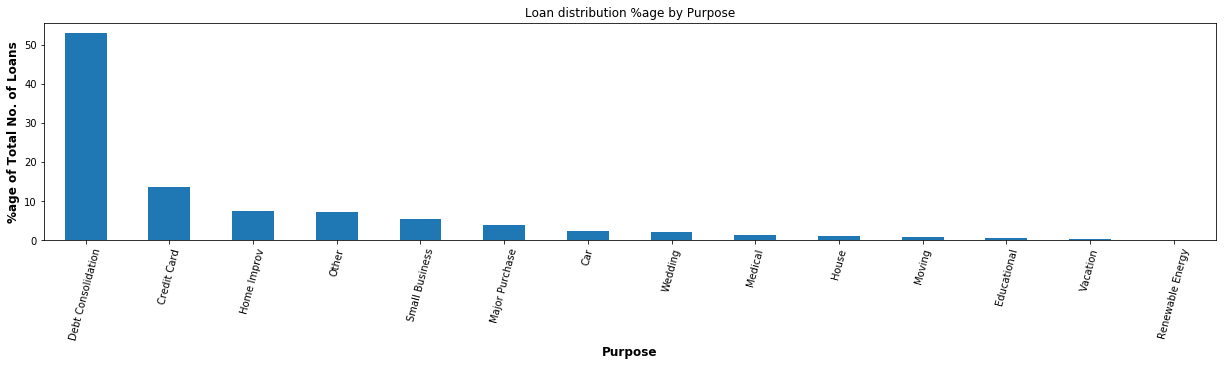

In [294]:
# Plotting the number of loans by purpose as a %age of total loan
loan_by_purpose_pct_plot = loan_by_purpose_pct.plot(kind='bar', title="Loan distribution %age by Purpose",figsize=(21,4), rot=75, legend=False)
_ = loan_by_purpose_pct_plot.set_xlabel("Purpose",fontsize=12,fontweight='bold')
_ = loan_by_purpose_pct_plot.set_ylabel("%age of Total No. of Loans",fontsize=12,fontweight='bold')

#### We can see that debt consolidation, credit card, other, home improvement, major purchase and small businesses are the top contributors (combined ~90%) of business. 

### Next we can check the default rate across purposes

In [295]:
loan_default_by_purpose = pd.DataFrame(loan.groupby(['purpose','loan_status'])['loan_status'].count())
loan_default_by_purpose = pd.DataFrame(loan_default_by_purpose.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))
loan_default_by_purpose

loan_status
purpose            loan_status             
Car                Charged Off        10.67
                   Fully Paid         89.33
Credit Card        Charged Off        10.78
                   Fully Paid         89.22
Debt Consolidation Charged Off        15.33
                   Fully Paid         84.67
Educational        Charged Off        17.23
                   Fully Paid         82.77
Home Improv        Charged Off        12.07
                   Fully Paid         87.93
House              Charged Off        16.08
                   Fully Paid         83.92
Major Purchase     Charged Off        10.33
                   Fully Paid         89.67
Medical            Charged Off        15.57
                   Fully Paid         84.43
Moving             Charged Off        15.97
                   Fully Paid         84.03
Other              Charged Off        16.38
                   Fully Paid         83.62
Renewable Energy   Charged Off        18.63
                   Fully Paid         81.37
Small Business     Charged Off        27.08
                   Fully Paid         72.92
Vacation           Charged Off        14.13
                   Fully Paid         85.87
Wedding            Charged Off        10.37
                   Fully Paid         89.63

#### It can be seen that the default rate for the 6 top revenue contributors is as follows:
##### Small Business 27%, Other 16%, Debt Consolidation 15%, Home Improvement 12%, Credit Cards 11%, Small Business 27%

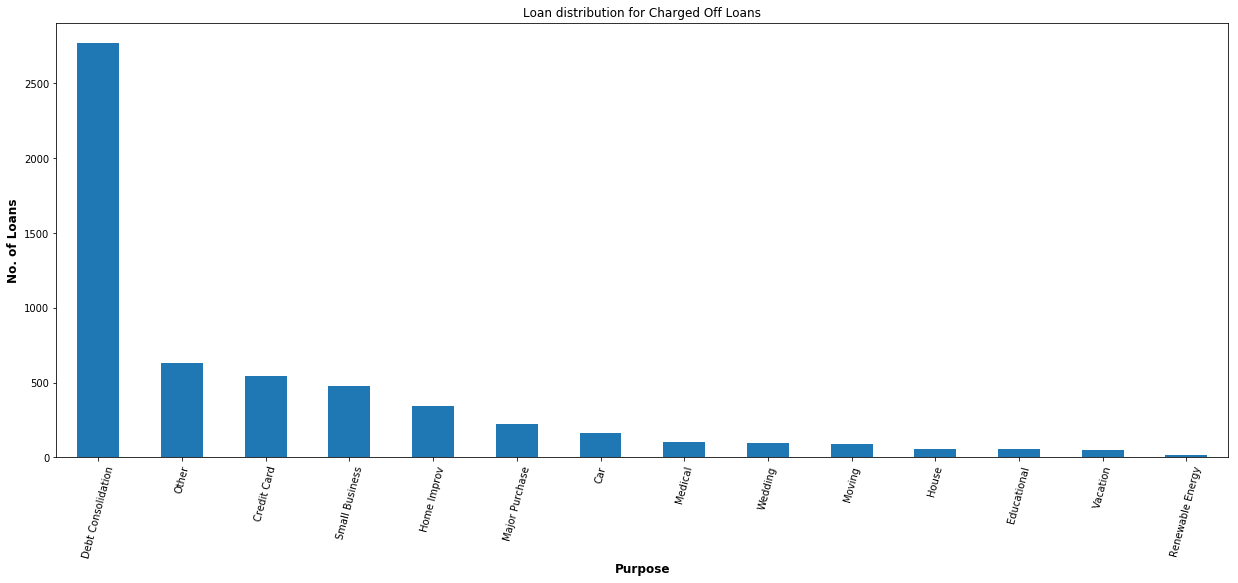

In [296]:
# Plotting the dostribution of loans that default
loan_default_by_purpose = pd.DataFrame(loan[loan.loan_status=='Charged Off'].groupby(['purpose'])['loan_status'].count().sort_values(ascending=False))
loan_default_by_purpose_pct_plot = loan_default_by_purpose.plot(kind='bar', title="Loan distribution for Charged Off Loans",figsize=(21,8), rot=75, legend=False)
_ = loan_default_by_purpose_pct_plot.set_xlabel("Purpose",fontsize=12,fontweight='bold')
_ = loan_default_by_purpose_pct_plot.set_ylabel("No. of Loans",fontsize=12,fontweight='bold')

#### The above plot ascertains that the number of loans that default is high for the top 6 revenue contributors. Since we do not know the purpose of 'Other' types of loans, we can restrict our further analysis to the top 5 except 'Other'.

In [297]:
loan = loan[loan.purpose.isin(['Credit Card','Debt Consolidation','Home Improv','Major Purchase','Small Business'])]
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,application_type,status_flag,issue_m,issue_y
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,Credit Card,AZ,27.65,INDIVIDUAL,0,12,2011
2,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,NaN,Small Business,IL,8.72,INDIVIDUAL,0,12,2011
6,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,Borrower added on 12/18/11 > I am planning o...,Debt Consolidation,NC,23.51,INDIVIDUAL,0,12,2011
8,5600,5600,5600.00,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,2011-12-01,Charged Off,Borrower added on 12/21/11 > I own a small h...,Small Business,CA,5.55,INDIVIDUAL,1,12,2011
10,6500,6500,6500.00,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,Borrower added on 12/15/11 > I had recived a...,Debt Consolidation,AZ,16.12,INDIVIDUAL,0,12,2011


### Analysis across Customer Demographic variables - income, employment length, home ownership status etc.

In [298]:
# Analysis for home ownership
# Let us first check the unique values for this column
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [299]:
# Checking the data where home ownership is None
loan[~loan.home_ownership.isin(['RENT', 'OWN', 'MORTGAGE', 'OTHER'])]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,application_type,status_flag,issue_m,issue_y
39318,10000,10000,1228.06,36 months,7.75%,312.22,A,A3,5 years,NONE,22200.00,Not Verified,2008-01-01,Fully Paid,"I plan to pay off my credit cards, leaving me ...",Debt Consolidation,VA,5.24,INDIVIDUAL,0,1,2008


In [300]:
# We can see that there is only 1 row where the loan has been paid off, We can ignore this row
loan = loan[loan.home_ownership != 'NONE']

In [301]:
loan_by_house_ownership = loan.groupby(['home_ownership','purpose'])['purpose'].count()
loan_by_house_ownership

home_ownership  purpose           
MORTGAGE        Credit Card           2209
                Debt Consolidation    7467
                Home Improv           2289
                Major Purchase         920
                Small Business         898
OTHER           Credit Card             11
                Debt Consolidation      40
                Home Improv              5
                Major Purchase           7
                Small Business          10
OWN             Credit Card            288
                Debt Consolidation    1274
                Home Improv            322
                Major Purchase         232
                Small Business         104
RENT            Credit Card           2519
                Debt Consolidation    9273
                Home Improv            259
                Major Purchase         991
                Small Business         742
Name: purpose, dtype: int64

#### We can see here that Debt Consolidation is the most popular loan across house ownership categories. Credit Card and Home Improvement are other top contributors.

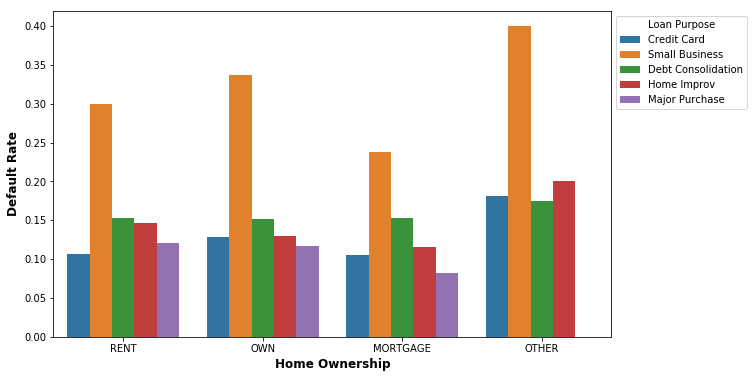

In [302]:
# Checking the loan default rate across home ownership status
plt.figure(figsize=(10, 6))
g = sns.barplot(x='home_ownership', y="status_flag", hue='purpose', data=loan, ci=None)
_ = g.legend(title='Loan Purpose',bbox_to_anchor=(1, 1))
_ = g.set_xlabel("Home Ownership",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### Small Business loans default the most, followed by Debt Consolidation in most of the home ownership segments

In [303]:
# Checking the values that emp_length has
loan.emp_length.unique()

array(['10+ years', '8 years', '4 years', '5 years', '< 1 year',
       '3 years', '6 years', '1 year', '2 years', '9 years', '7 years',
       nan], dtype=object)

In [304]:
# We can create buckets of emp_length as follows:
# employment length unknown -  "Unknown"
#  employment <=1 year can be considered as "Freshers"
#  1 - 3 years of experience can be considered as "Juniors"
#  4 - 7 years of experience can be considered as "Seniors"
#  more than 7 years of experience can be considered as "Experts"
loan['emp_length_category'] = loan.emp_length.apply(lambda x : "Unknown" if pd.isna(x) else "Freshers" if x in ['< 1 year','1 year'] else "Juniors" if x in ['2 years','3 years'] else "Seniors" if x in ['4 years','5 years','6 years','7 years'] else "Experts")

In [305]:
loan_by_emp_len = loan.groupby(['emp_length_category','purpose'])['purpose'].count()
loan_by_emp_len

emp_length_category  purpose           
Experts              Credit Card           1433
                     Debt Consolidation    5354
                     Home Improv           1110
                     Major Purchase         555
                     Small Business         448
Freshers             Credit Card           1061
                     Debt Consolidation    3424
                     Home Improv            371
                     Major Purchase         449
                     Small Business         399
Juniors              Credit Card           1060
                     Debt Consolidation    3890
                     Home Improv            555
                     Major Purchase         487
                     Small Business         405
Seniors              Credit Card           1345
                     Debt Consolidation    5006
                     Home Improv            749
                     Major Purchase         589
                     Small Business         458


#### We can see that Debt Consolidation is the most popular loan purpose, followed by credit card among all categories.

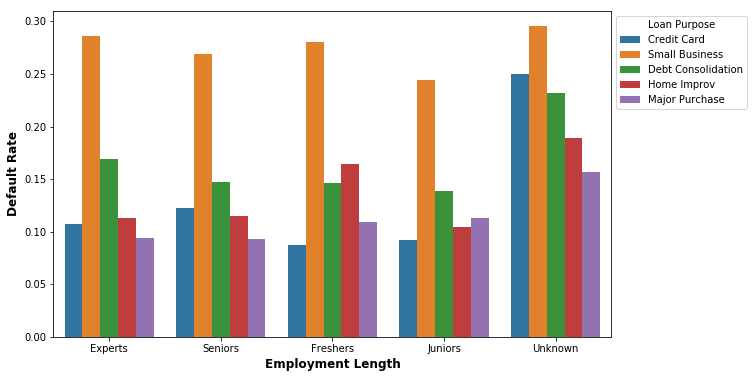

In [306]:
# Plotting the default rate by purpose across categories of employment length
plt.figure(figsize=(10, 6))
g = sns.barplot(x='emp_length_category', y="status_flag", hue='purpose', data=loan, ci=None)
_ = g.legend(title='Loan Purpose',bbox_to_anchor=(1, 1))
_ = g.set_xlabel("Employment Length",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see here that Small Business loans have the most default rate followed by Debt Consolidation except freshers, where Home Improvment loans have the second most default rate

In [307]:
# For annual income, checking the distribution that the values have
loan.annual_inc.describe(percentiles=[.05, .25, .5, .75, .95])

count     29860.00
mean      70223.06
std       67784.48
min        4080.00
5%        25000.00
25%       42000.00
50%       60000.00
75%       84000.00
95%      144000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [308]:
# For annual income analysis, we can create bins of income ranges
loan['income_category'] = loan.annual_inc.apply(lambda x : "< 25K" if (0 <= x < 25000) else "25K - 50K" if (25000 <= x < 50000) else "50K - 75K" if (50000 <= x < 75000) else "75K - 100K" if (75000 <= x < 100000) else "> 100K")
income_order = ['< 25K', '25K - 50K', '50K - 75K', '75K - 100K', '> 100K']
loan['income_category'] = pd.Categorical(loan['income_category'],categories=income_order, ordered=True)

In [309]:
# Checking loan distribution across income categories
loan_by_inc = loan.groupby(['income_category','purpose'])['purpose'].count()
loan_by_inc

income_category  purpose           
< 25K            Credit Card            204
                 Debt Consolidation     888
                 Home Improv             89
                 Major Purchase         193
                 Small Business          86
25K - 50K        Credit Card           1475
                 Debt Consolidation    5822
                 Home Improv            626
                 Major Purchase         727
                 Small Business         456
50K - 75K        Credit Card           1598
                 Debt Consolidation    5845
                 Home Improv            798
                 Major Purchase         616
                 Small Business         542
75K - 100K       Credit Card            878
                 Debt Consolidation    2988
                 Home Improv            575
                 Major Purchase         308
                 Small Business         316
> 100K           Credit Card            872
                 Debt Consolidation    2

#### We can see that Debt Consolidation is the most popular loan purpose, followed by credit card among all income groups.

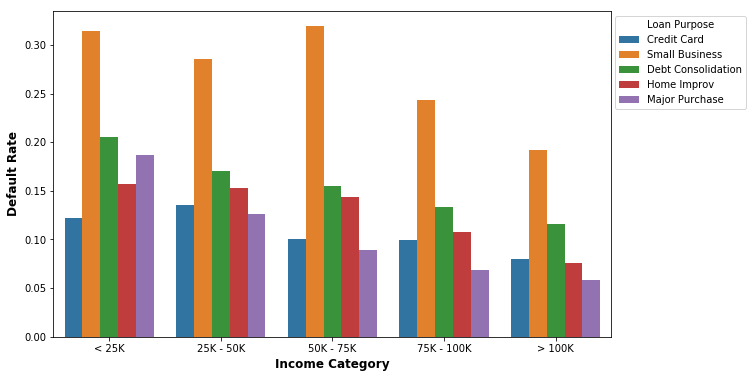

In [310]:
# Plotting the default rate by purpose across categories of income
plt.figure(figsize=(10, 6))
g = sns.barplot(x='income_category', y="status_flag", hue='purpose', data=loan, ci=None)
_ = g.legend(title='Loan Purpose',bbox_to_anchor=(1.25, 1))
_ = g.set_xlabel("Income Category",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see that that Small Business has the highest default rate followed by Debt Consolidation in all income categories.

### It can be seen that the trend is similar for all customer demographics. Debt Consolidaiton and Credit Card are the most popular loans. Small Business and Debt Consolidation have the highest default rate.

### Analysis for Loan Charecteristics - Interest Rate, Loan Amount, Term, Installment, Verification Status & Grade

In [311]:
# For interest rate analysis, we'll first strip out the '%' character and change it to numeric
loan['int_rate'] = loan['int_rate'].str[:-1]
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

In [312]:
# Let us first see the variation that interest rate shows:
loan.int_rate.describe(percentiles=[.05, .25, .5, .75, .95])

count   29860.00
mean       12.07
std         3.72
min         5.42
5%          6.17
25%         9.32
50%        11.86
75%        14.65
95%        18.62
max        24.11
Name: int_rate, dtype: float64

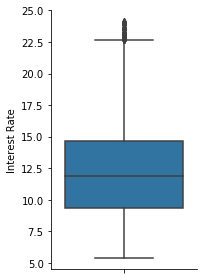

In [313]:
# We can show the same as a box plot
g = sns.catplot(y="int_rate", kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Interest Rate")
plt.show()

#### As we can see, the median interest rate is roughly 12% with majority of the values between 6-18%. Other values above 18% can be clearly considered as outliers.

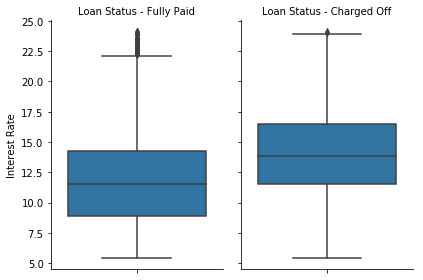

In [314]:
# Comparing the distribution of interest rate values for Fully Paid and Charged off loans
g = sns.catplot(y="int_rate", col='loan_status', kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Interest Rate").set_titles("Loan Status - {col_name}")
plt.show()

#### It can be seen that loans which default tend who have higher interest rate than loans that don't.

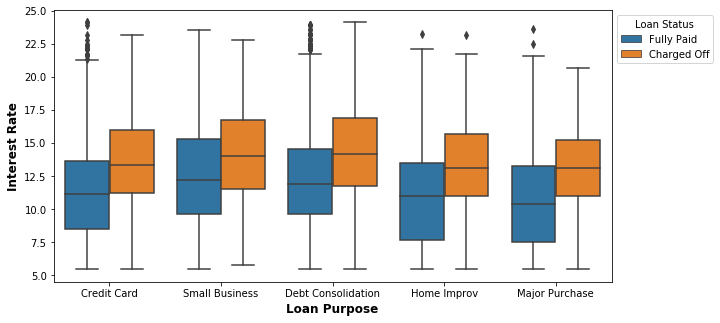

In [315]:
# Plotting interest rates for both types of loans across purposes
plt.figure(figsize=(10, 5))
g = sns.boxplot(y="int_rate", x='purpose', hue = 'loan_status', data=loan)
_ = g.legend(title='Loan Status',bbox_to_anchor=(1, 1))
_ = g.set_xlabel("Loan Purpose",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Interest Rate",fontsize=12,fontweight='bold')
plt.show()

#### We can see that above observation holds true across purposes, that loans that default tend to have higher interest rates than those that don't. 
#### Interest rate must be relevent when predicting the likelihood of a borrower defaulting on the loan.

In [316]:
# For Loan Amount Analysis, let us first see the variation that the loan amount shows:
loan.loan_amnt.describe(percentiles=[.05, .25, .5, .75, .95])

count   29860.00
mean    11963.11
std      7441.29
min       500.00
5%       2850.00
25%      6000.00
50%     10000.00
75%     16000.00
95%     25000.00
max     35000.00
Name: loan_amnt, dtype: float64

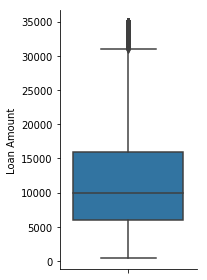

In [317]:
# # We can show the same as a box plot
g = sns.catplot(y="loan_amnt", kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Loan Amount")
plt.show()

#### Above, we're studying the distribution of loan amount. We also note the level above which we observe outliers in the data.

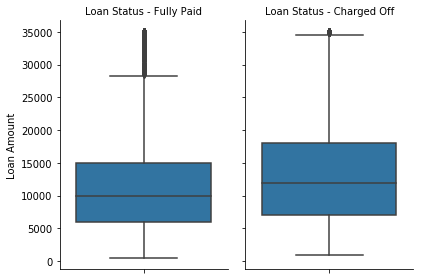

In [318]:
# comparing the distribution of loan amount values for Fully Paid loans and Defaulted loans
g = sns.catplot(y="loan_amnt", col='loan_status', kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Loan Amount").set_titles("Loan Status - {col_name}")
plt.show()

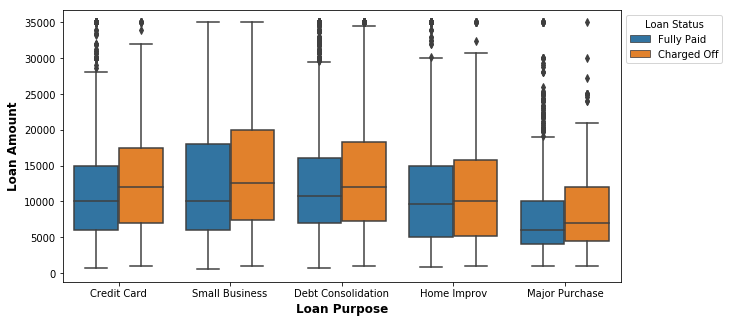

In [319]:
# Plotting loan amount distribution for both types of loans across purposes
plt.figure(figsize=(10, 5))
g = sns.boxplot(y="loan_amnt", x='purpose', hue = 'loan_status', data=loan)
_ = g.legend(title='Loan Status',bbox_to_anchor=(1, 1))
_ = g.set_xlabel("Loan Purpose",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Loan Amount",fontsize=12,fontweight='bold')
plt.show()

#### Here we can see that for the purposes which have a higher default rate (Small business, debt consolidation and credit card), the median borrowed amount is higher in case of the defaulted loans. 

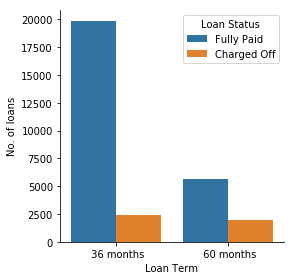

In [320]:
# Plotting the count of loans by term period categorized by loan status
g = sns.catplot(x="term", hue='loan_status', kind="count", data=loan, height=4, legend=False)
_ = g.set_axis_labels("Loan Term", "No. of loans")
plt.legend(title='Loan Status',loc='upper right')
plt.show()

#### We can see that the number of defaulters is almost the same for both the term periods. However there's a noticeable difference when it comes to fully paid loans. 
#### This indicates a higher likelyhood of default on loans with the longer term period of 60 months.

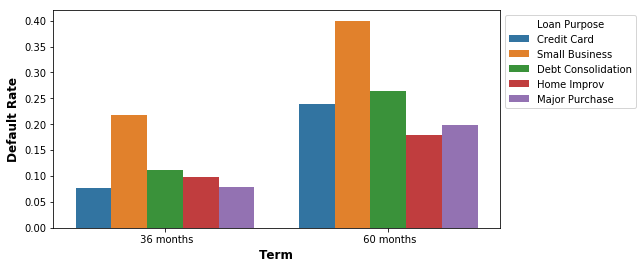

In [321]:
# Plotting the default rate across purposes categorised by term
plt.figure(figsize=(8, 4))
g = sns.barplot(x='term', y="status_flag", hue='purpose', data=loan, ci=None)
_ = g.legend(title='Loan Purpose',bbox_to_anchor=(1, 1))
_ = g.set_xlabel("Term",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### The observation made able is consistent across purposes, the default rate is high for loans with a higher term.

In [322]:
# For installment Analysis, let us first see the variation that the loan amount shows:
loan.installment.describe(percentiles=[.05, .25, .5, .75, .95])

count   29860.00
mean      348.63
std       210.94
min        16.25
5%         87.02
25%       189.95
50%       310.10
75%       463.30
95%       790.86
max      1305.19
Name: installment, dtype: float64

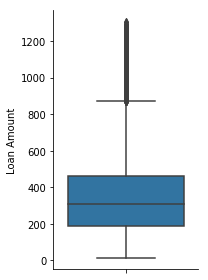

In [323]:
# we can also show it as a box plot
g = sns.catplot(y="installment", kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Loan Amount")
plt.show()

#### We can see here that most of the loan installments are from 100-800. There are quite a few outliers as well.

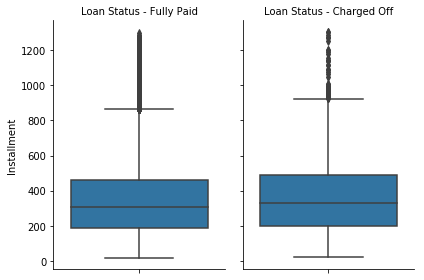

In [324]:
# Comparing the distribution of installment values for Fully Paid and Charged off laons
g = sns.catplot(y="installment", col='loan_status', kind="box", data=loan, height=4, aspect=.75)
_ = g.set_axis_labels("", "Installment").set_titles("Loan Status - {col_name}")
plt.show()

#### We can see in the  above plot that installment value doesn't have much significance in a loan being defaulted.

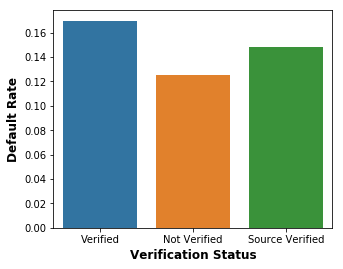

In [325]:
# Plotting the default rate across verification status
plt.figure(figsize=(5, 4))
g = sns.barplot(x='verification_status', y="status_flag", data=loan, ci=None)
_ = g.set_xlabel("Verification Status",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see a strange observation here that verified loans have a higher default rate than others.

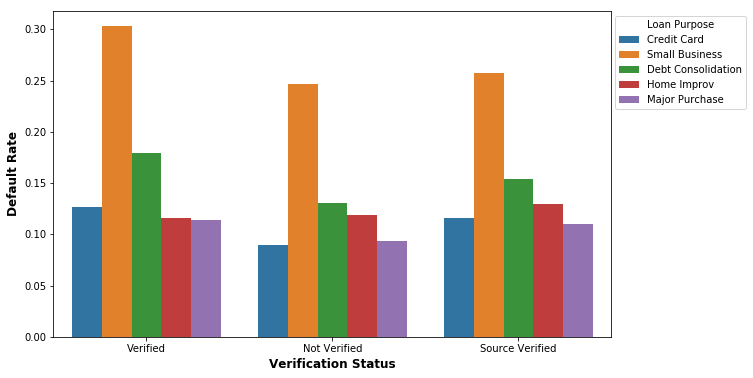

In [326]:
# Plotting the default rate by verification status across categories of purpose
plt.figure(figsize=(10, 6))
g = sns.barplot(x='verification_status', y="status_flag", hue='purpose', data=loan, ci=None)
_ = g.legend(title='Loan Purpose',bbox_to_anchor=(1.25, 1))
_ = g.set_xlabel("Verification Status",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see that except Home Improvement, for all other purpose categories verified loans have a higher default rate.

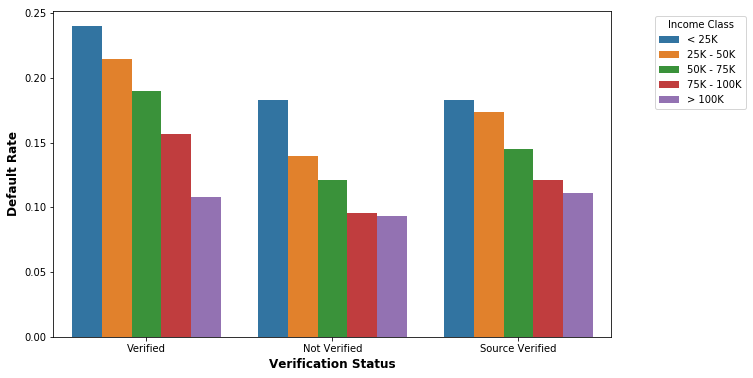

In [327]:
# Plotting the default rate by verification status across categories of income
plt.figure(figsize=(10, 6))
g = sns.barplot(x='verification_status', y="status_flag", hue='income_category', data=loan, ci=None)
_ = g.legend(title='Income Class',bbox_to_anchor=(1.25, 1))
_ = g.set_xlabel("Verification Status",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### This is a striking observation that for all verification statuses, lower income groups have a higher default rate than higher income groups.
#### Also, borrowers who're not verified have a larger contribution to the business and maintain a lower default rate as compared to verified and source-verified customers.

In [328]:
# %age of business brought by grade
loan_by_grade = pd.DataFrame(loan.groupby('grade').funded_amnt.sum().sort_values(ascending=False))
loan_by_grade_pct = pd.DataFrame(loan_by_grade.funded_amnt*100/loan_by_grade.funded_amnt.sum())
loan_by_grade_pct

,funded_amnt
grade,
B,29.79
C,20.06
A,19.06
D,15.03
E,10.22
F,4.33
G,1.50


#### We can see that most of the business (> 80%) is in the 4 grades A, B, C and D

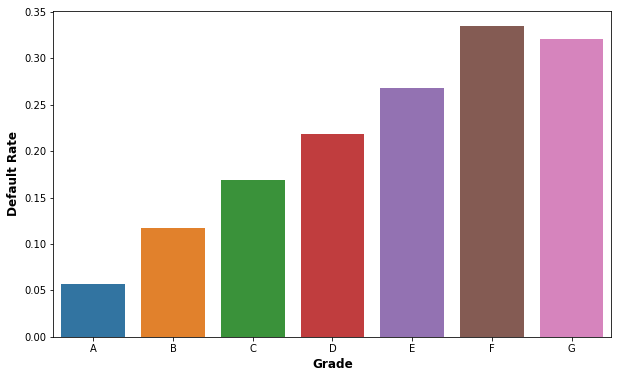

In [329]:
# Plotting the default rate across grade
plt.figure(figsize=(10, 6))
grade_order = ["A", "B", "C", "D","E","F","G"]
loan['grade'] = pd.Categorical(loan['grade'],categories=grade_order, ordered=True)
g = sns.barplot(x='grade', y="status_flag", data=loan, ci=None)
_ = g.set_xlabel("Grade",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see here that the although the default rate for grade A is low (less than 5%), default rate for B(~12%), C(~17%) and D(~21%) is high. We will now analyse the sub grades for grades A, B, C and 
#### Grades E, F and G have higher default rates, but combined they bring only 15% of revenue. A small improvement in grades A, B, C and D w.r.t. default rate can significantly decrease the credit loss.

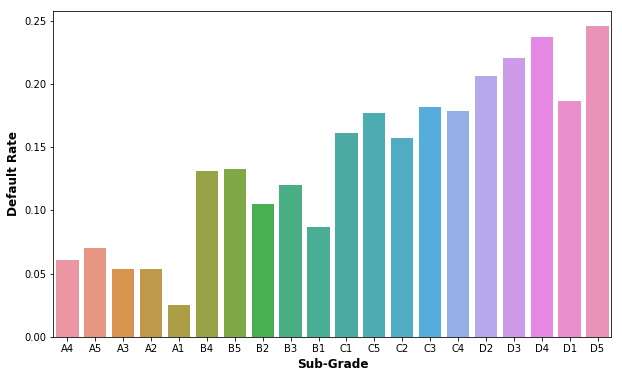

In [330]:
# Plotting the default rate across sub-grades
plt.figure(figsize=(10, 6))
g = sns.barplot(x='sub_grade', y="status_flag", data=loan[loan.grade.isin(['A','B','C','D'])].sort_values(by='grade'), ci=None)
_ = g.set_xlabel("Sub-Grade",fontsize=12,fontweight='bold')
_ = g.set_ylabel("Default Rate",fontsize=12,fontweight='bold')

#### We can see here that the default rates for the sub-grades are in line with order of the default rate for the grades.

### Correlation Study

In [331]:
loan['term_month'] = loan['term'].apply(lambda x: x[:2])
loan['term_month'] = pd.to_numeric(loan['term_month'])
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace('<',''))
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace(' years',''))
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace(' year',''))
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace('+',''))
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace('nan','0'))
loan['emp_length'] = pd.to_numeric(loan['emp_length'])
#adding derived metric for correlating as a numeric value

corr_loans = loan

We create a copy of our dataset for the correlation study. 
Below, we remove the outlier values in Interest rate, loan amount, annual income and installments. 

Since these columns have few values that are very large when compared to their medians, we mark them as outliers and remove them from this part of the analysis

In [332]:
# To remove outliers, as a standard, we are using 95 percentile as the max value.
# The 95 %ile values have been shown in the respective analysis done above.
corr_loans = corr_loans[corr_loans['int_rate']<=18.62]
corr_loans = corr_loans[corr_loans['loan_amnt']<=25000]
corr_loans = corr_loans[corr_loans['annual_inc']<=144000]
corr_loans = corr_loans[corr_loans['installment']<=790.86]

.

In [333]:
#create new dataframe for the correlation matrix
corr = pd.DataFrame()
corr['status_flag'] = corr_loans['status_flag']
corr['loan_amnt'] = corr_loans['loan_amnt']
corr['term_month'] = corr_loans['term_month']
corr['term_month'] = corr['term_month']
corr['installment'] = corr_loans['installment']
corr['emp_length'] = corr_loans['emp_length']
corr['int_rate'] = corr_loans['int_rate']
corr['dti'] = corr_loans['dti']
corr['annual_inc'] = corr_loans['annual_inc']
corr.columns = ['Status Flag', 'Loan Amount', 'Term', 'Installment', 'Employment Length', 'Interest Rate', 'DTI', 'Annual Income']
corr.head()

,Status Flag,Loan Amount,Term,Installment,Employment Length,Interest Rate,DTI,Annual Income
0,0,5000,3,162.87,10,10.65,27.65,24000.00
2,0,2400,3,84.33,10,15.96,8.72,12252.00
6,0,7000,6,170.08,8,15.96,23.51,47004.00
10,0,6500,6,153.45,5,14.65,16.12,72000.00
11,0,12000,3,402.54,10,12.69,10.78,75000.00


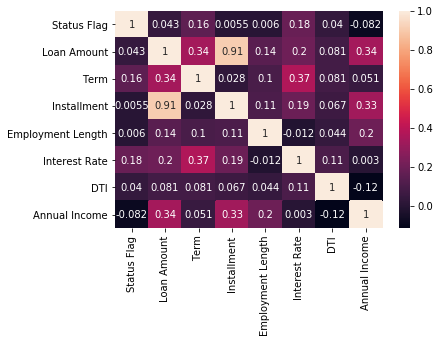

In [334]:
_ = sns.heatmap(corr.corr(), annot=True)

The correlation heat-map tells the following about defaulters:
1. Longer term period most likely comes with a higher interest rate. It also suggests higher loan amount and installment.
    1.1 These factors show a higher likelihood of defaulting.

2. Income is negatively correlated, although the value is small. This is in-line with lower default rates observed in high income groups and vice versa. 

3. Larger installment is not very strongly correlated with defaulting. However when coupled with high interest rate and loan amount it becomes significant. 

4. It also shows that high income borrowers taking small low interest loans are less likely to default.
    